<a href="https://colab.research.google.com/github/Agam9427/SOC-DL/blob/main/CNN_LSTM_stock_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_ratio=0.85

In [2]:
#Reading Data
data = pd.read_csv('https://raw.githubusercontent.com/Agam9427/SOC-DL/main/AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-13,36.375000,37.122501,36.360001,36.942501,34.972214,100797600
1,2017-07-14,36.992500,37.332500,36.832500,37.259998,35.272774,80528400
2,2017-07-17,37.205002,37.724998,37.142502,37.389999,35.395847,95174000
3,2017-07-18,37.299999,37.532501,37.167500,37.520000,35.518921,71475200
4,2017-07-19,37.619999,37.855000,37.487499,37.755001,35.741379,83692000


In [3]:
#Data Preprocesing Using Z-score technique
mdata=data.drop('Date',axis=1)

from scipy.stats import zscore
mdata = mdata.apply(zscore)
mdata.head()
len(mdata.index)


1258

In [4]:
#Making matrices of 10*6 shape
mdata=np.array(mdata)
dataset=[]
label=[]
for i in range(len(data.index) - 11):
  dataset.append(mdata[i:i+10])
  label.append(mdata[i+11][0])
label = np.array(label)
dataset = np.array(dataset)



In [5]:
#Splitting Data
r=int(len(dataset)*train_ratio)
X_train=dataset[:r]
X_test=dataset[r:]
y_train=label[:r]
y_test=label[r:]

In [6]:
#Model
model = keras.models.Sequential()
model.add(layers.Conv1D(32,1,padding='same',activation='tanh',input_shape=(10,6)))
model.add(layers.MaxPool1D(pool_size=1,padding='same'))
model.add(layers.LSTM(64,activation='tanh',))
model.add(layers.Dense(1))

In [13]:
model.compile(loss='mean_absolute_error',optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 32)            224       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 32)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 25,121
Trainable params: 25,121
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
17/17 [==============================] - 2s 33ms/step - loss: 0.1656 - accuracy: 0.0000e+00 - val_loss: 0.4371 - val_accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 0.0859 - accuracy: 0.0000e+00 - val_loss: 0.3144 - val_accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0628 - accuracy: 0.0000e+00 - val_loss: 0.2137 - val_accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0547 - accuracy: 0.0000e+00 - val_loss: 0.2149 - val_accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0432 - accuracy: 0.0000e+00 - val_loss: 0.2018 - val_accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0420 - accuracy: 0.0000e+00 - val_loss: 0.1705 - val_accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0406 - accuracy: 0.0000e+00 -

In [10]:
#Converting data back to Stock Price
m=data['Open'].mean()
s=data['Open'].std()
y_pred = model.predict(X_test)
y_pred = (y_pred * s) + m
y_test = (y_test * s) + m

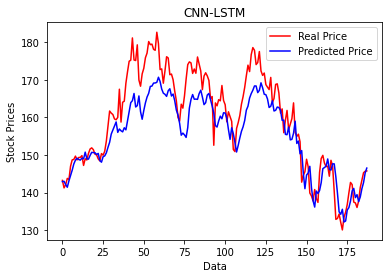

In [12]:
#Plotting Result
plt.plot([x for x in range(len(y_test))],y_test,color='red')
plt.plot([x for x in range(len(y_test))],y_pred,color='blue')
plt.xlabel('Data')
plt.ylabel('Stock Prices')
plt.title("CNN-LSTM")
plt.legend(['Real Price','Predicted Price'])
plt.show()